In [13]:
import pandas as pd

# Load the dataset (assuming CSV format)
data = pd.read_csv('NFTlyze Dataset.csv')
data.head()

,Date,Sales_USD_cumsum,Number_of_Sales_cumsum,Active_Market_Wallets_cumsum,Primary_Sales_cumsum,Secondary_Sales_cumsum,AverageUSD_cum,Sales_USD,Number_of_Sales,Active_Market_Wallets,Primary_Sales
0,2017-06-22,0.00,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-06-23,1020.30,19,8.0,0,19.0,53.70,1020.30,19.0,8.0,0.0
2,2017-06-24,2261.14,40,21.0,0,21.0,56.53,1240.84,21.0,13.0,0.0
3,2017-06-25,2778.69,53,28.0,0,13.0,52.43,517.55,13.0,7.0,0.0
4,2017-06-26,3203.32,67,34.0,0,14.0,47.81,424.63,14.0,6.0,0.0


In [12]:
import sqlite3

# Create connection to SQLite database
conn = sqlite3.connect('nft_sales.db')

# Store the data in the SQLite database
data.to_sql('nft_sales', conn, if_exists='replace', index=False)
conn.close()

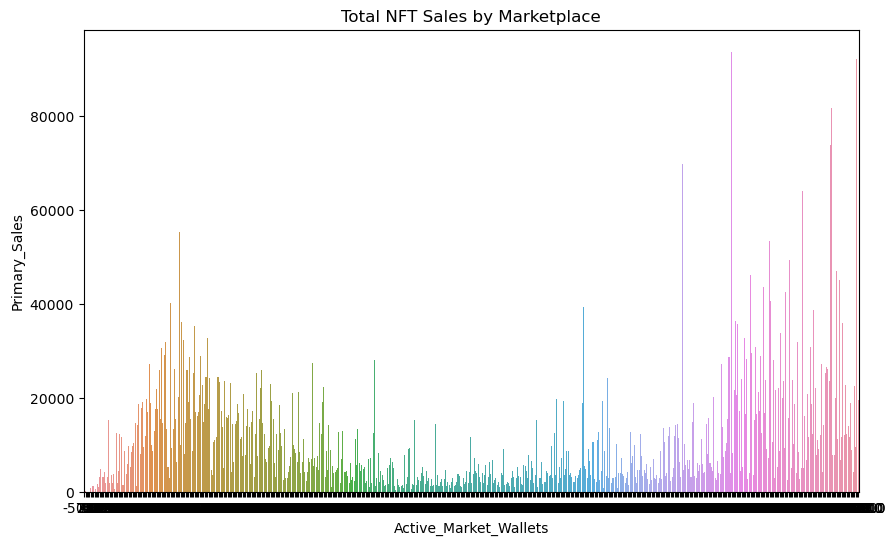

In [15]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping sales by marketplace
marketplace_sales = data.groupby('Active_Market_Wallets')['Primary_Sales'].sum().reset_index()

# Plot sales distribution by marketplace
plt.figure(figsize=(10, 6))
sns.barplot(x='Active_Market_Wallets', y='Primary_Sales', data=marketplace_sales)
plt.title('Total NFT Sales by Marketplace')
plt.show()

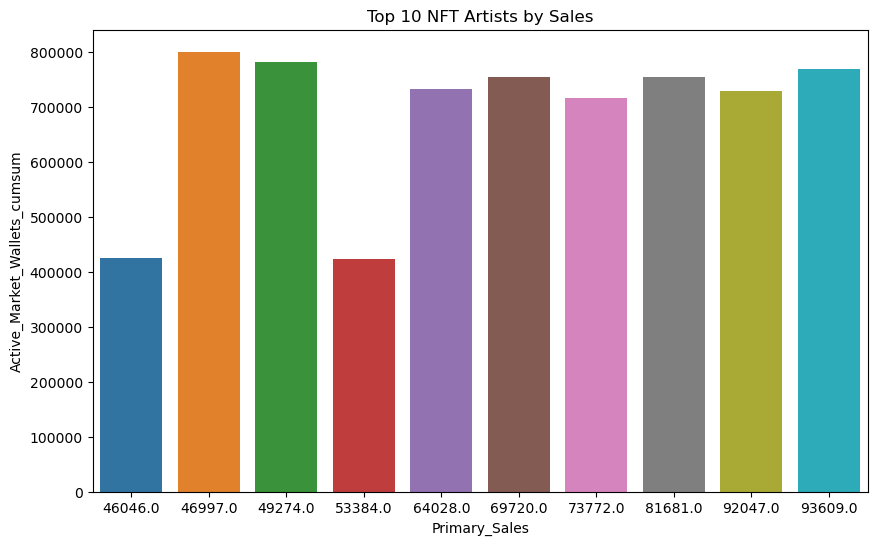

In [17]:
# Group by artist and calculate total sales
top_artists = data.groupby('Active_Market_Wallets_cumsum')['Primary_Sales'].sum().reset_index().sort_values(by='Primary_Sales', ascending=False)

# Visualize the top 10 selling artists
plt.figure(figsize=(10, 6))
sns.barplot(x='Primary_Sales', y='Active_Market_Wallets_cumsum', data=top_artists.head(10))
plt.title('Top 10 NFT Artists by Sales')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_6836\4282438781.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


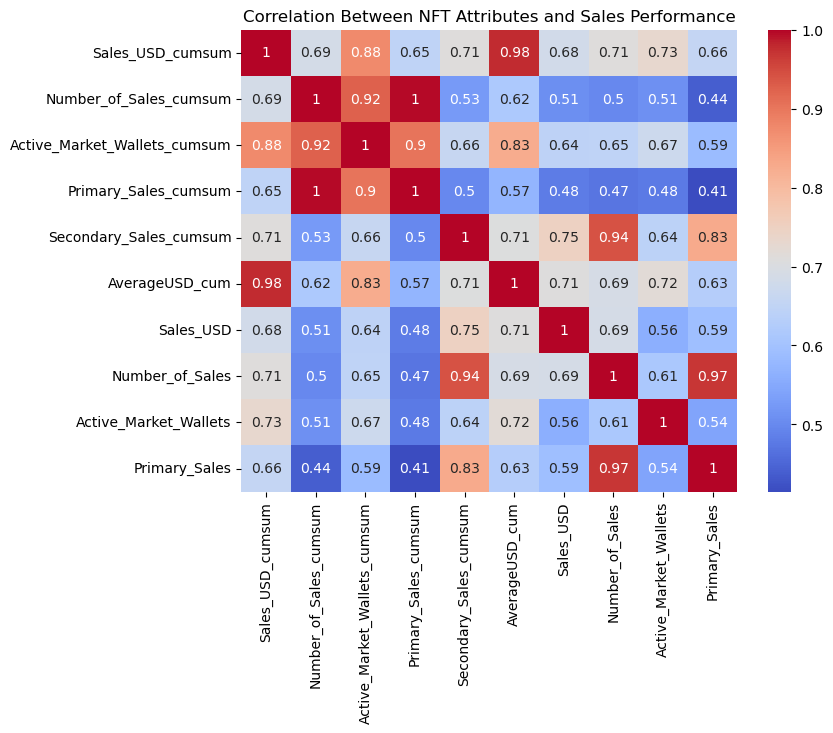

In [18]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between NFT Attributes and Sales Performance')
plt.show()

In [19]:
# Convert the sale date to a datetime object
data['sale_date'] = pd.to_datetime(data['Date'])

# Aggregate sales by date for time series analysis
daily_sales = data.groupby('sale_date')['Primary_Sales'].sum().reset_index()